In [13]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#!pip3 install mysql.connector
#!pip3 install pymysql
#!pip3 install ipython-sql
#!pip3 install mysqlclient
#!pip install pyodbc

In [1]:
import pyodbc 
#Driver='{SQL Server Native Client 11.0}'
conn = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};"
                      "SERVER=g3.campus-quest.com,23001;"
                      "DATABASE=DGDB;"
                      "UID=sa;""PWD=Academic2022U3!")
cursor = conn.cursor()

In [3]:

cursor.execute('SELECT name, database_id, create_date FROM sys.Databases')

for i in cursor:
    print(i)

('master', 1, datetime.datetime(2003, 4, 8, 9, 13, 36, 390000))
('tempdb', 2, datetime.datetime(2022, 4, 9, 3, 23, 24, 920000))
('model', 3, datetime.datetime(2003, 4, 8, 9, 13, 36, 390000))
('msdb', 4, datetime.datetime(2022, 1, 12, 22, 54, 24, 927000))
('DWDiagnostics', 5, datetime.datetime(2022, 2, 21, 2, 18, 41, 30000))
('DWConfiguration', 6, datetime.datetime(2022, 2, 21, 2, 18, 54, 447000))
('DWQueue', 7, datetime.datetime(2022, 2, 21, 2, 18, 59, 730000))
('Book', 8, datetime.datetime(2022, 2, 21, 2, 19, 24, 707000))
('Company', 9, datetime.datetime(2022, 2, 21, 2, 19, 26, 753000))
('DGDB', 10, datetime.datetime(2022, 2, 21, 2, 19, 29, 893000))
('Prop', 11, datetime.datetime(2022, 4, 8, 5, 1, 46, 883000))
('SP', 12, datetime.datetime(2022, 2, 21, 2, 19, 56, 443000))
('Sales', 13, datetime.datetime(2022, 2, 21, 2, 19, 57, 997000))
('Zeota', 14, datetime.datetime(2022, 4, 8, 5, 2, 26, 667000))
('oes2', 15, datetime.datetime(2022, 2, 21, 2, 21, 52, 450000))


In [21]:
#USECASE1 For every schema, list Schema, # tables, # records
df=pd.read_sql_query('exec DGDB.dbo.usecase1dgdb_a',conn)

display(df)

,table_name,numberofrecords
0,\tADDRESS\t,6
1,\tAUTHOR\t,1
2,\tAUTHOR_ADDRESS\t,3
3,\tAUTHOR_COAUTHOR_MANUSC\t,2
4,\tBANKINFO\t,1
...,...,...
118,VENDORPRICE,5
119,viewing,4
120,Vndor_PROMOTION,6
121,Warehouse,7


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122]),
 [Text(0, 0, '\tADDRESS\t'),
  Text(1, 0, '\tAUTHOR\t'),
  Text(2, 0, '\tAUTHOR_ADDRESS\t'),
  Text(3, 0, '\tAUTHOR_COAUTHOR_MANUSC\t'),
  Text(4, 0, '\tBANKINFO\t'),
  Text(5, 0, '\tBOOK\t'),
  Text(6, 0, '\tBOOK_SEND_SHOP\t'),
  Text(7, 0, '\tBOOKREVIEW\t'),
  Text(8, 0, '\tCONTRACT\t'),
  Text(9, 0,

C:\Users\avina\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\avina\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


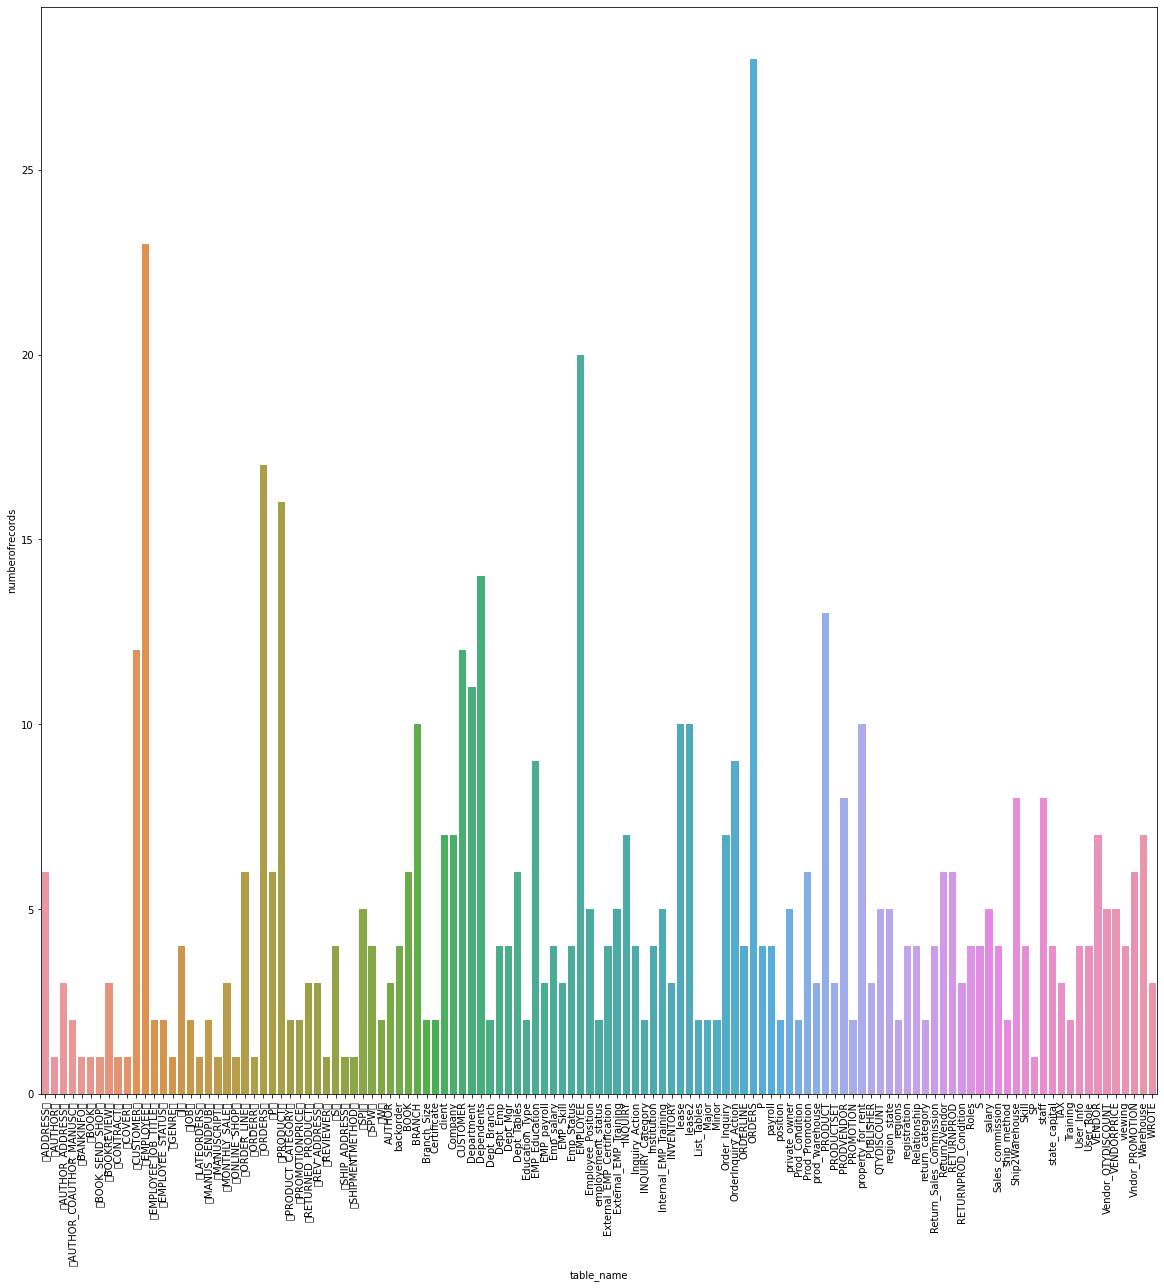

In [32]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['table_name'],y=df['numberofrecords'] )
plt.xticks(rotation = 90)

In [33]:
df=pd.read_sql_query('exec DGDB.dbo.usecase1dgdb_b',conn)

display(df)

,schema_name,numberoftables
0,Book,6
1,Camp,5
2,FURN,8
3,GAMES,6
4,Prop,9
5,PUBCO,24
6,SP,3
7,SPJ2,6
8,Zeota,76


<AxesSubplot:xlabel='schema_name', ylabel='numberoftables'>

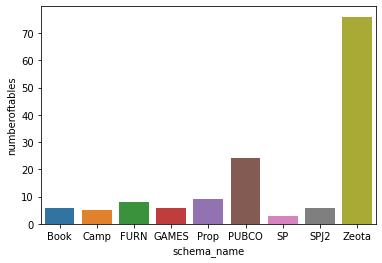

In [34]:
sns.barplot(x=df['schema_name'],y=df['numberoftables'] )

In [108]:

##USECASE2 For every schema, list table name, # attributes,#  PK_ attr, # FK_ attr, # NN_attr, # IDX_attr,
# CC_attr, # UQ_attrs, # PGM_attr

# df=pd.read_sql_query('SELECT name, database_id, create_date FROM sys.Databases',conn)
df=pd.read_sql_query('exec DGDB.dbo.report_exe',conn)

display(df)



,schema_name,ATTR,FK,IDX,PK,PGM,UQ,CC,NN
0,Book,22,6.0,NaN,8.0,1.0,1.0,2.0,15.0
1,Camp,42,9.0,27.0,9.0,2.0,NaN,10.0,33.0
2,FURN,45,13.0,16.0,13.0,2.0,NaN,7.0,35.0
3,GAMES,45,13.0,16.0,11.0,2.0,NaN,11.0,13.0
4,Prop,58,NaN,19.0,10.0,NaN,NaN,NaN,NaN
5,PUBCO,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SP,9,NaN,2.0,2.0,NaN,NaN,NaN,NaN
7,SPJ2,25,6.0,9.0,10.0,NaN,NaN,4.0,20.0
8,Zeota,365,84.0,141.0,93.0,38.0,NaN,36.0,166.0


In [109]:
df = df.set_index('schema_name')
df

,ATTR,FK,IDX,PK,PGM,UQ,CC,NN
schema_name,,,,,,,,
Book,22,6.0,NaN,8.0,1.0,1.0,2.0,15.0
Camp,42,9.0,27.0,9.0,2.0,NaN,10.0,33.0
FURN,45,13.0,16.0,13.0,2.0,NaN,7.0,35.0
GAMES,45,13.0,16.0,11.0,2.0,NaN,11.0,13.0
Prop,58,NaN,19.0,10.0,NaN,NaN,NaN,NaN
PUBCO,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP,9,NaN,2.0,2.0,NaN,NaN,NaN,NaN
SPJ2,25,6.0,9.0,10.0,NaN,NaN,4.0,20.0
Zeota,365,84.0,141.0,93.0,38.0,NaN,36.0,166.0


In [110]:
df.index

Index(['Book', 'Camp', 'FURN', 'GAMES', 'Prop', 'PUBCO', 'SP', 'SPJ2',
       'Zeota'],
      dtype='object', name='schema_name')

In [111]:
df = df.fillna(0)


In [112]:
for i in df.columns:
    df[i]= df[i].astype('int64')


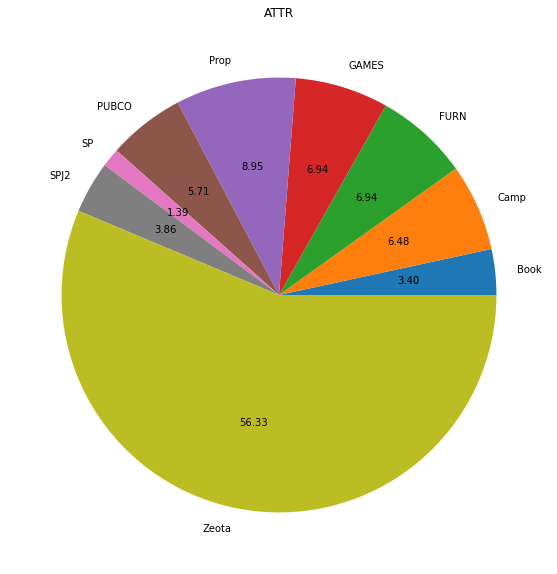

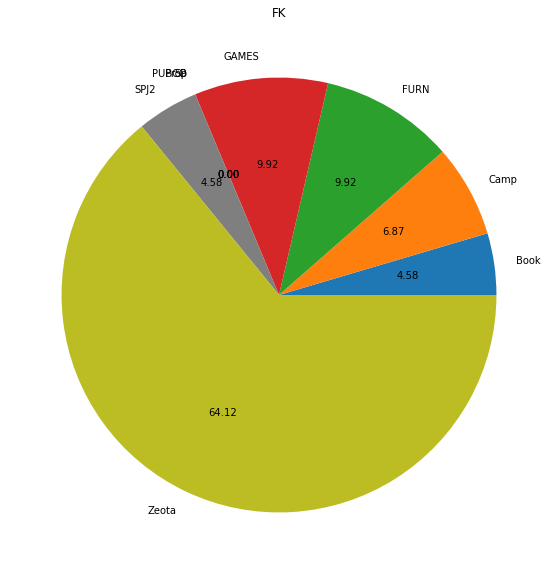

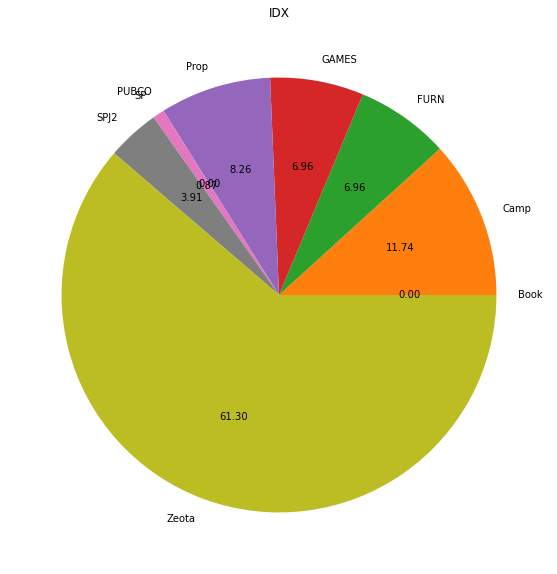

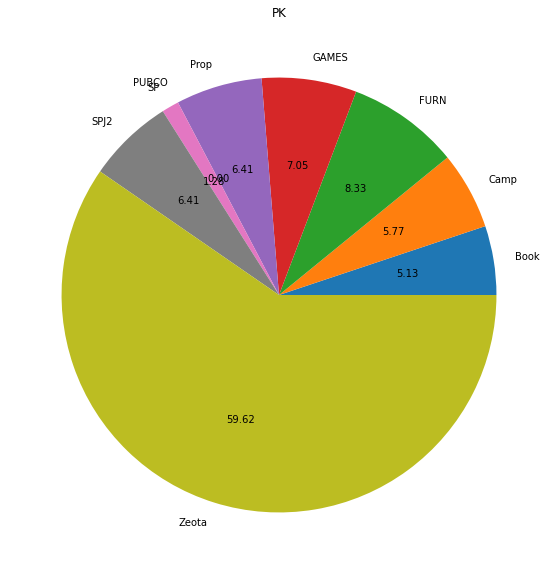

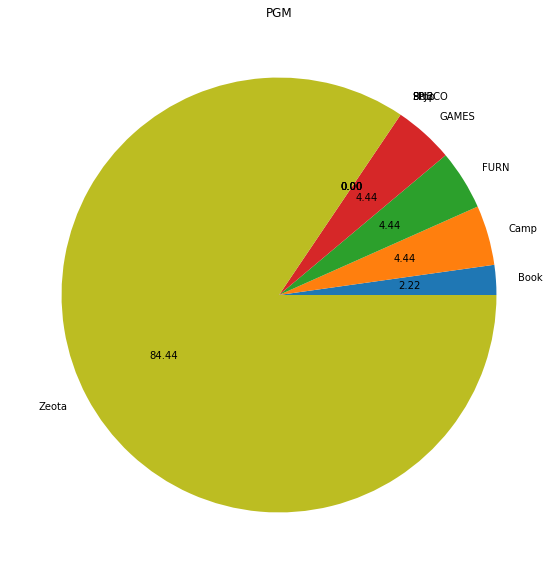

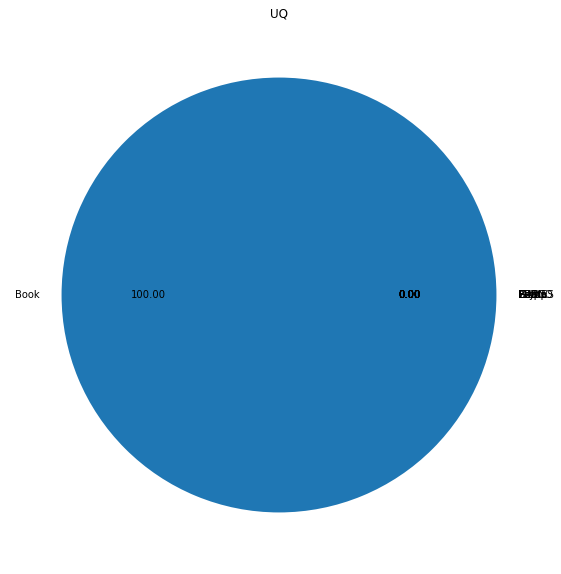

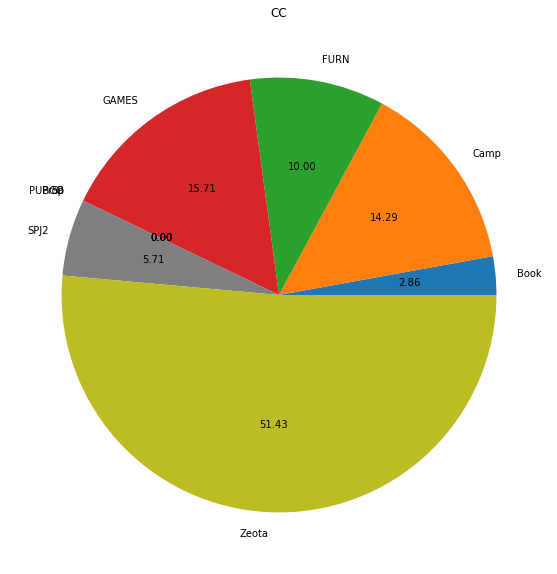

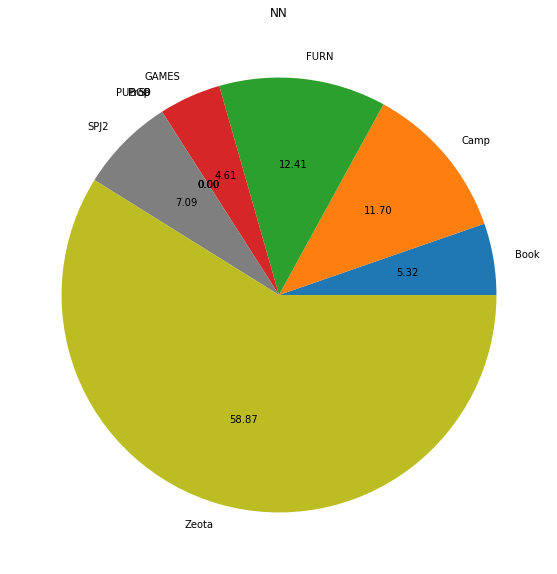

In [117]:


for i in df.columns:
#mylabels = ["schema_name"]
    plt.figure(figsize=(10,10))
    plt.title(i)
    plt.pie(df[i] , labels = df.index, autopct='%.2f' )
    plt.show() 

In [67]:
#USECASE3  For every schema, list Table_ID, Table_Name, attribute_id, attribute_Name
#PK_ID, FK_ID, NN_ID, constraint_type, and constraint_Name
df=pd.read_sql_query('exec DGDB.dbo.usecase3dgdb',conn)

display(df)

,schema_name,Table_Name,Table_ID,Attributes_ID,Attributes_Name,Constraint_Type,Constraint_name,FK_ID,Constraint_Type,Constraint_name,IDX_ID,Constraint_Type,Constraint_name,PK_ID,Constraint_name,CC_ID,Constraint_name,NN_ID
0,Book,AUTHOR,DGT000169,DGA_ID_1161,AUTHOR_NUM,None,None,None,None,None,None,PK,AUTHOR_AUTHOR_NUM_PK,DGC_PK_ID_172,None,None,AUTHOR_AUTHOR_NUM_NN,DGC_NN_ID_278
1,Book,AUTHOR,DGT000169,DGA_ID_1162,AUTHOR_LAST,None,None,None,None,None,None,None,None,None,None,None,AUTHOR_AUTHOR_LAST_NN,DGC_NN_ID_279
2,Book,AUTHOR,DGT000169,DGA_ID_1163,AUTHOR_FIRST,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Book,Book,DGT000167,DGA_ID_1164,PUBLISHER_CODE,None,None,None,None,None,None,PK,PUBLISHER_PUBLISHER_CODE_PK,DGC_PK_ID_173,None,None,PUBLISHER_PUBLISHER_CODE_NN,DGC_NN_ID_280
4,Book,Book,DGT000167,DGA_ID_1165,PUBLISHER_NAME,None,None,None,None,None,None,None,None,None,None,None,PUBLISHER_PUBLISHER_NAME_NN,DGC_NN_ID_281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Zeota,Warehouse,DGT000069,DGA_ID_321,street,None,None,None,None,None,None,None,None,None,None,None,None,None
598,Zeota,Warehouse,DGT000069,DGA_ID_322,city,None,None,None,None,None,None,None,None,None,None,None,None,None
599,Zeota,Warehouse,DGT000069,DGA_ID_323,state,None,None,None,None,None,None,None,None,None,None,None,None,None
600,Zeota,Warehouse,DGT000069,DGA_ID_324,zip,None,None,None,None,None,None,None,None,None,None,None,None,None


In [63]:
df = df.set_index('schema_name')
df

,Table_Name,Table_ID,Attributes_ID,Attributes_Name,Constraint_Type,Constraint_name,FK_ID,Constraint_Type,Constraint_name,IDX_ID,Constraint_Type,Constraint_name,PK_ID,Constraint_name,CC_ID,Constraint_name,NN_ID
schema_name,,,,,,,,,,,,,,,,,
Book,AUTHOR,DGT000169,DGA_ID_1161,AUTHOR_NUM,None,None,None,None,None,None,PK,AUTHOR_AUTHOR_NUM_PK,DGC_PK_ID_172,None,None,AUTHOR_AUTHOR_NUM_NN,DGC_NN_ID_278
Book,AUTHOR,DGT000169,DGA_ID_1162,AUTHOR_LAST,None,None,None,None,None,None,None,None,None,None,None,AUTHOR_AUTHOR_LAST_NN,DGC_NN_ID_279
Book,AUTHOR,DGT000169,DGA_ID_1163,AUTHOR_FIRST,None,None,None,None,None,None,None,None,None,None,None,None,None
Book,Book,DGT000167,DGA_ID_1164,PUBLISHER_CODE,None,None,None,None,None,None,PK,PUBLISHER_PUBLISHER_CODE_PK,DGC_PK_ID_173,None,None,PUBLISHER_PUBLISHER_CODE_NN,DGC_NN_ID_280
Book,Book,DGT000167,DGA_ID_1165,PUBLISHER_NAME,None,None,None,None,None,None,None,None,None,None,None,PUBLISHER_PUBLISHER_NAME_NN,DGC_NN_ID_281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeota,Warehouse,DGT000069,DGA_ID_321,street,None,None,None,None,None,None,None,None,None,None,None,None,None
Zeota,Warehouse,DGT000069,DGA_ID_322,city,None,None,None,None,None,None,None,None,None,None,None,None,None
Zeota,Warehouse,DGT000069,DGA_ID_323,state,None,None,None,None,None,None,None,None,None,None,None,None,None


In [64]:
df.index

Index(['Book', 'Book', 'Book', 'Book', 'Book', 'Book', 'Book', 'Book', 'Book',
       'Book',
       ...
       'Zeota', 'Zeota', 'Zeota', 'Zeota', 'Zeota', 'Zeota', 'Zeota', 'Zeota',
       'Zeota', 'Zeota'],
      dtype='object', name='schema_name', length=602)

In [68]:
sns.set_theme(style="ticks", color_codes=True)
sns.catplot(x="schema_name", y="FK_ID", kind="swarm")


ValueError: Could not interpret input 'schema_name'

In [69]:
#usecase4 For every schema, list tables with PK but without FK and IDX
df=pd.read_sql_query('exec DGDB.dbo.usecase4dgdb',conn)

display(df)

,schema_name,Table_Name,PK_ID,FK_ID,IDX_ID
0,Book,AUTHOR,DGC_PK_ID_172,None,None
1,Book,Book,DGC_PK_ID_170,None,None
2,Book,Book,DGC_PK_ID_173,None,None
3,Book,Branch,DGC_PK_ID_171,None,None
4,GAMES,\tPRODUCT\t,\tDGC_PK_ID_196\t,None,None
5,Zeota,External_EMP_Certification,DGC_PK_ID_51,None,None
6,Zeota,External_EMP_Training,DGC_PK_ID_52,None,None
7,Zeota,Internal_EMP_Training,DGC_PK_ID_57,None,None
8,Zeota,salary,DGC_PK_ID_80,None,None
9,Zeota,state_capital,DGC_PK_ID_83,None,None


<AxesSubplot:xlabel='schema_name', ylabel='count'>

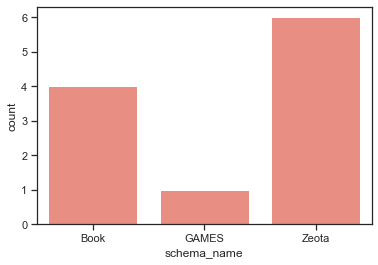

In [71]:
sns.countplot(x ='schema_name', data = df,
              color="salmon",)

In [72]:
#usecase5 For every database/schema, rank them according to number of NN (Not Null) have created
df=pd.read_sql_query('exec DGDB.dbo.USECASE5_NN_DGDB',conn)

display(df)


,schema_name,Table_Name,NN,RANKING
0,FURN,\tEMPLOYEE_JOB_TITLE\t,1,1
1,GAMES,\tORDERS\t,1,1
2,Zeota,Certificate,1,1
3,Zeota,Department,1,1
4,Zeota,Emp_salary,1,1
...,...,...,...,...
91,Zeota,Order_Inquiry,6,92
92,Zeota,EMP_Education,6,92
93,Camp,\tPRODUCT\t,6,92
94,Book,Book,6,92


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   schema_name  96 non-null     object
 1   Table_Name   96 non-null     object
 2   NN           96 non-null     int64 
 3   RANKING      96 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


<AxesSubplot:xlabel='schema_name', ylabel='count'>

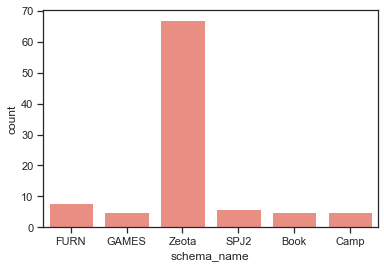

In [73]:
sns.countplot(x ='schema_name', data = df,
              color="salmon",)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, '\tEMPLOYEE_JOB_TITLE\t'),
  Text(1, 0, '\tORDERS\t'),
  Text(2, 0, 'Certificate'),
  Text(3, 0, 'Department'),
  Text(4, 0, 'Emp_salary'),
  Text(5, 0, 'employement_status'),
  Text(6, 0, 'Education_Type'),
  Text(7, 0, 'INQUIRY_Category'),
  Text(8, 0, 'Institution'),
  Text(9, 0, 'List_Tables'),
  Text(10, 0, 'Major'),
  Text(11, 0, 'Minor'),
  Text(12, 0, 'position'),
  Text(13, 0, 'Prod_Condition'),
  Text(14, 0, 'PROMOTION'),
  Text(15, 0, 'regions'),
  Text(16, 0, 'return_category'),
  Text(17, 0, 'RETURNPROD_Condition'),
  Text(18, 0, 'Roles'),
  Text(19, 0, 'ship_method

C:\Users\avina\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\avina\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


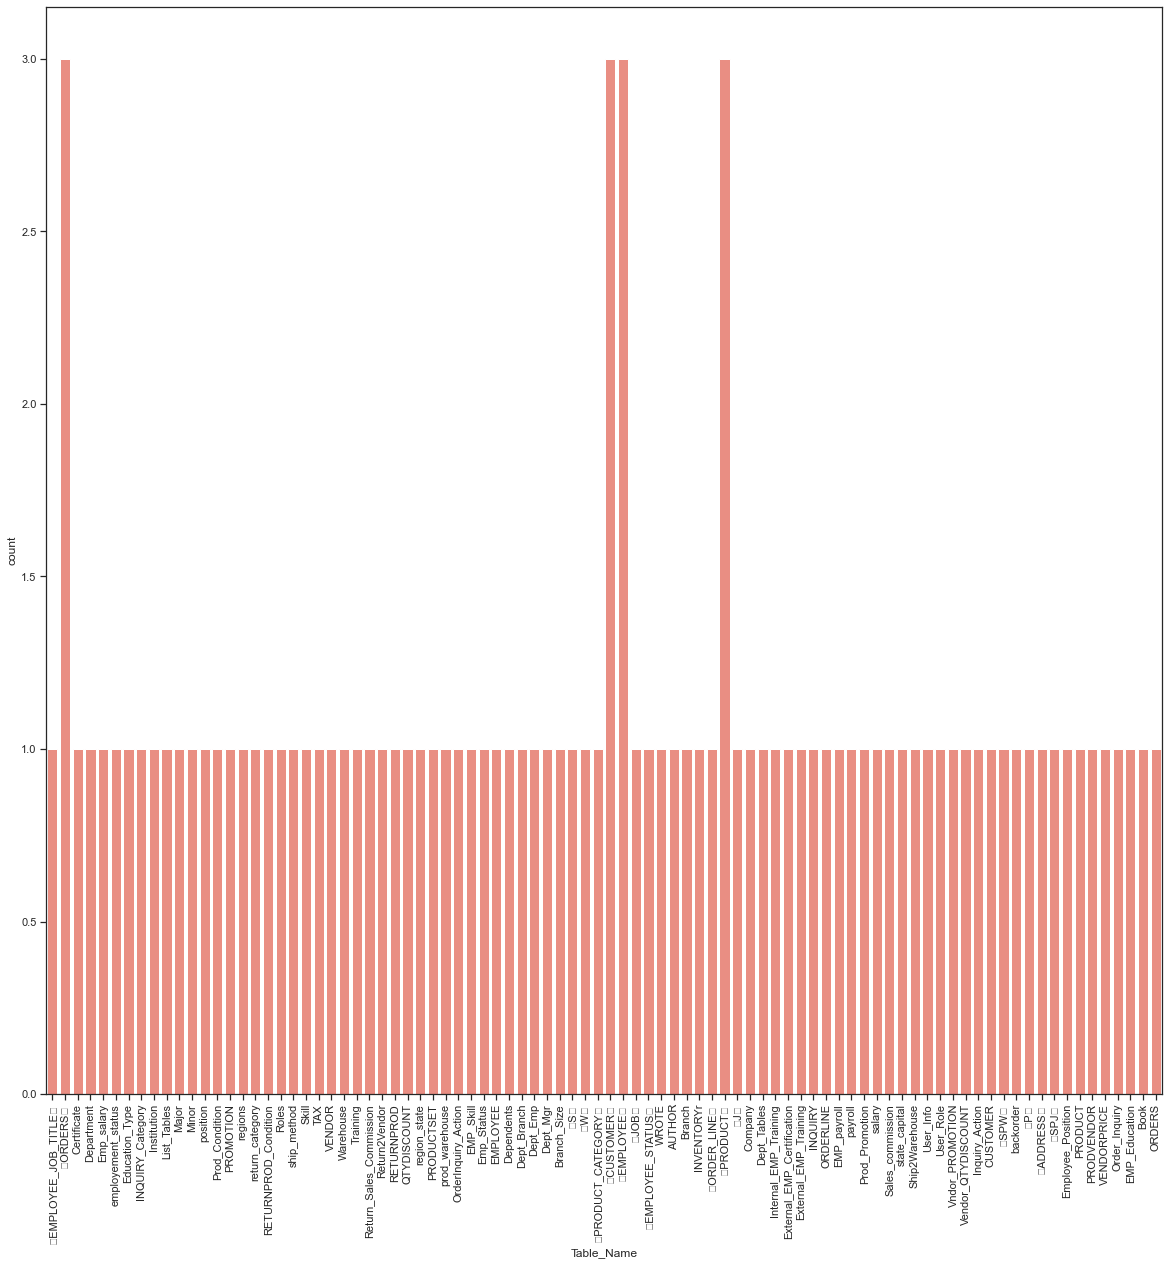

In [76]:
plt.figure(figsize=(20,20))
sns.countplot(x ='Table_Name', data = df,color="salmon",)
plt.xticks(rotation = 90)

In [78]:
#usecase6 For every database, list tables without PK
df=pd.read_sql_query('exec DGDB.dbo.usecase6dgdb',conn)

display(df)


,SCHEMA_NAME,TABLE_NAME


In [80]:
#usecase7 For every database, list tables without IDX

df=pd.read_sql_query('exec DGDB.dbo.usecase7_withoutIDX_DGDB',conn)
df

,schema_name,Table_Name,IDX


In [81]:
#usecase8 For every database, list tables with PK but without FK

df=pd.read_sql_query('exec DGDB.dbo.usecase8_withPK_withoutFK_DGDB',conn)
df

,SCHEMA_NAME,tableswithPKbutwithoutFK
0,Book,3
1,Camp,8
2,FURN,10
3,GAMES,6
4,Prop,48
5,PUBCO,2
6,SP,8
7,SPJ2,16
8,Zeota,102


<AxesSubplot:xlabel='SCHEMA_NAME', ylabel='tableswithPKbutwithoutFK'>

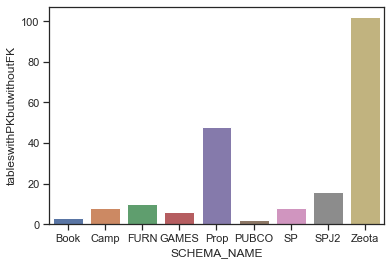

In [84]:
sns.barplot(x=df['SCHEMA_NAME'],y=df['tableswithPKbutwithoutFK'] )

In [85]:
#usecase9 For every database/schema, list tables with PK but without IDX

df=pd.read_sql_query('exec DGDB.dbo.usecase9_withPK_withoutIDX_DGDB',conn)
df

,SCHEMA_NAME,TABLE_NAME,PK_ID,IDX_ID
0,Book,AUTHOR,DGC_PK_ID_172,None
1,Book,Book,DGC_PK_ID_170,None
2,Book,Book,DGC_PK_ID_173,None
3,Book,Branch,DGC_PK_ID_171,None
4,Book,INVENTORYr,DGC_PK_ID_174,None
5,Book,INVENTORYr,DGC_PK_ID_175,None
6,Book,WROTE,DGC_PK_ID_176,None
7,Book,WROTE,DGC_PK_ID_177,None
8,FURN,\tORDER_LINE\t,\tDGC_PK_ID_186\t,None
9,FURN,\tORDER_LINE\t,\tDGC_PK_ID_187\t,None


In [86]:
#usecase10 For every database/schema, list tables with CC
df=pd.read_sql_query('exec DGDB.dbo.usecase10_withCC_DGDB',conn)
df

,schema_name,Table_Name,CC
0,Book,AUTHOR,3
1,Book,Book,9
2,Book,Branch,4
3,Book,INVENTORYr,3
4,Book,PUBLISHER,1
...,...,...,...
132,Zeota,VENDOR,7
133,Zeota,Vendor_QTYDISCOUNT,5
134,Zeota,VENDORPRICE,5
135,Zeota,Vndor_PROMOTION,6


<AxesSubplot:xlabel='schema_name', ylabel='count'>

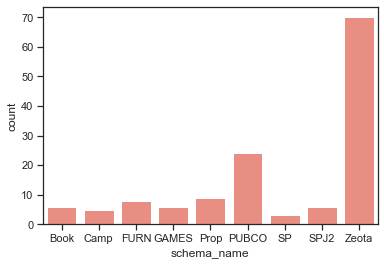

In [88]:
sns.countplot(x ='schema_name', data = df,color="salmon",)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 [Text(0, 0, 'AUTHOR'),
  Text(1, 0, 'Book'),
  Text(2, 0, 'Branch'),
  Text(3, 0, 'INVENTORYr'),
  Text(4, 0, 'PUBLISHER'),
  Text(5, 0, 'WROTE'),
  Text(6, 0, '\tADDRESS\t'),
  Text(7, 0, '\tCUSTOMER\t'),
  Text(8, 0, '\tEMPLOYEE\t'),
  Text(9, 0, '\tORDERS\t'),
  Text(10, 0, '\tPRODUC

C:\Users\avina\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\avina\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


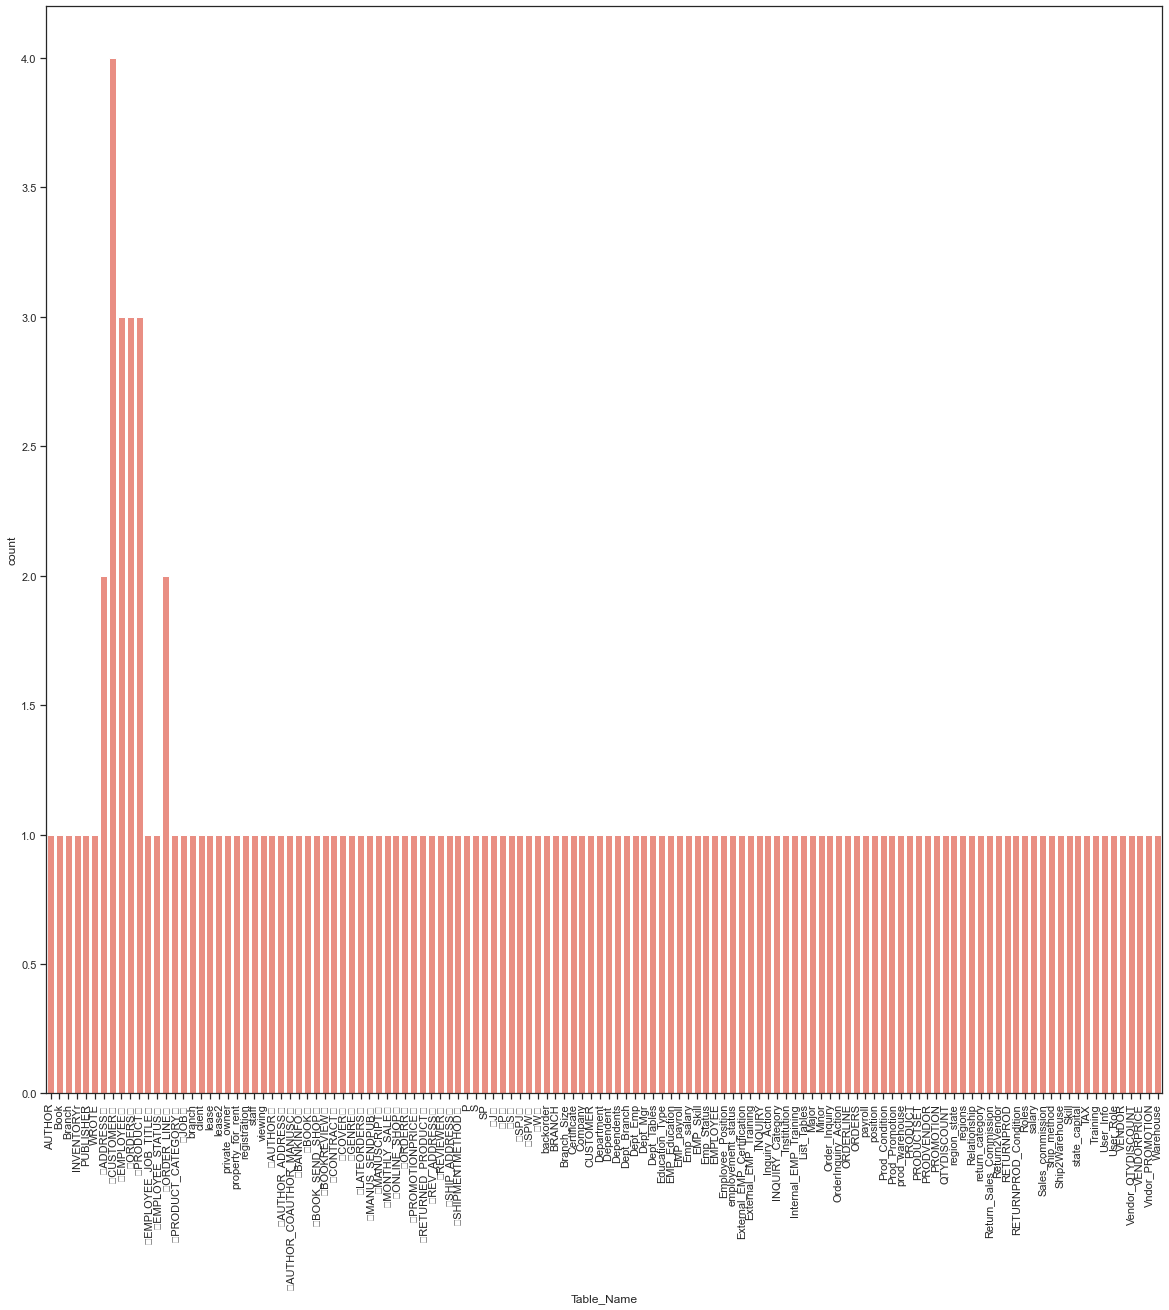

In [90]:
plt.figure(figsize=(20,20))
sns.countplot(x ='Table_Name', data = df,color="salmon",)
plt.xticks(rotation = 90)


In [91]:
#usecase11 For every database/schema, list tables with PGM
df=pd.read_sql_query('exec DGDB.dbo.usecase11_withPGM_DGDB',conn)
df

,schema_name,Table_Name,PGM
0,Book,AUTHOR,3
1,Book,Book,9
2,Book,Branch,4
3,Book,INVENTORYr,3
4,Book,PUBLISHER,1
...,...,...,...
132,Zeota,VENDOR,7
133,Zeota,Vendor_QTYDISCOUNT,5
134,Zeota,VENDORPRICE,5
135,Zeota,Vndor_PROMOTION,6


<AxesSubplot:xlabel='schema_name', ylabel='count'>

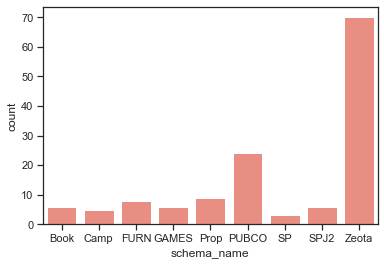

In [92]:
sns.countplot(x ='schema_name', data = df,color="salmon",)

In [94]:
#usecase12 For every database/schema, list all views (View name, View description)
df=pd.read_sql_query('exec DGDB.dbo.usecase12_VIEW',conn)
df

,schema_name,V_name,View_ID


In [95]:
#usecase13 For every database/schema, list all table with audit table
df=pd.read_sql_query('exec DGDB.dbo.usecase13_AUDIT',conn)
df

,schema_name,Table_Name,Aname
0,Zeota,ORDERS,orders_audit
1,Zeota,PRODUCT,product_audit
2,Zeota,Return_Sales_Commission,return_sales_commission_audit;
3,Zeota,RETURNPROD,returnprod_audit
4,Zeota,Roles,Roles_audit;
5,Zeota,Sales_commission,sales_commission_audit
6,Zeota,Skill,Skill_audit;


In [99]:
#usecase14 For every database/schema, list schema, users, role, Dept
df=pd.read_sql_query('exec DGDB.dbo.usecase14_USER_ROLE_UNIT',conn)
df

,schema_name,User_ID,Role_Name,Unit_Name
0,Zeota,AHeisler,Purchasing Manager,Purchasing
1,Zeota,AMartin,Administration Manager,Administration
2,Zeota,AMurthy,Customer Service Manager,Customer Service
3,Zeota,APregmon,Finance Manager,Finance
4,Zeota,APregmon1,Sales Manager,Sales
...,...,...,...,...
83,Zeota,TDoering,Administration Manager,Administration
84,Zeota,TStansbury,Customer Service Manager,Customer Service
85,Zeota,WDoering,Human Resources Manager,HR
86,Zeota,Worral,MIS Manager,MIS


In [17]:
import pyodbc 
#Driver='{SQL Server Native Client 11.0}'
conx = pyodbc.connect("DRIVER={SQL Server Native Client 11.0};"
                      "SERVER=g3.campus-quest.com,23000;"
                      "DATABASE=ZEOTA;"
                      "UID=sa;""PWD=Academic2022U3!")
cursor = conx.cursor()

In [37]:
df=pd.read_sql_query('exec ZEOTA.DBO.USECASE5_NN_SQLSERVER1',conx)

display(df)

,TABLE_CATALOG,TABLE_NAME,NN,RANKING
0,Book,AUTHOR,1,1
1,Book,BOOK,1,1
2,Book,BRANCH,1,1
3,Book,PUBLISHER,1,1
4,Prop,branch,1,1
...,...,...,...,...
90,Company,DEPARTMENT,4,91
91,Zeota,EMPLOYEE,4,91
92,Zeota,VENDORPRICE,4,91
93,Company,DEPENDENT,5,94


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TABLE_CATALOG  95 non-null     object
 1   TABLE_NAME     95 non-null     object
 2   NN             95 non-null     int64 
 3   RANKING        95 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


In [39]:
df.columns

Index(['TABLE_CATALOG', 'TABLE_NAME', 'NN', 'RANKING'], dtype='object')

In [43]:
convert_dict = {'TABLE_CATALOG': str, 'TABLE_NAME' : str}
df = df.astype(convert_dict)
print(df.dtypes)

TABLE_CATALOG    object
TABLE_NAME       object
NN                int64
RANKING           int64
dtype: object


In [46]:
categorical_columns=[i for i in df.columns if df.dtypes[i]=='object']
categorical_columns

['TABLE_CATALOG', 'TABLE_NAME']

In [47]:
quantitative_columns=[i for i in df.columns if df.dtypes[i]!='object']
quantitative_columns


['NN', 'RANKING']

<AxesSubplot:xlabel='TABLE_CATALOG', ylabel='NN'>

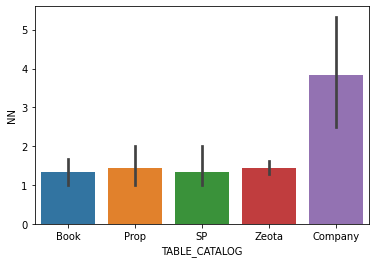

In [49]:
sns.barplot(x=df['TABLE_CATALOG'],y=df['NN'])

<AxesSubplot:xlabel='TABLE_CATALOG', ylabel='RANKING'>

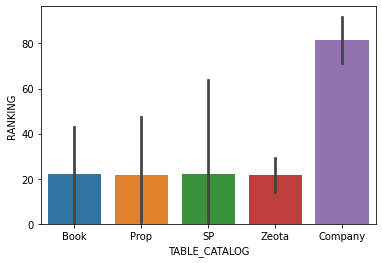

In [51]:
sns.barplot(x=df['TABLE_CATALOG'],y=df['RANKING'])

In [56]:
df=pd.read_sql_query('exec ZEOTA.dbo.usecase2sql',conx)

display(df)

,SCHEMANAME,TABLE_NAME,CONSTRAINT_TYPE,COUNT
0,BOOK,AUTHOR,ATTRIBUTES,3
1,BOOK,BOOK,ATTRIBUTES,6
2,BOOK,BRANCH,ATTRIBUTES,4
3,BOOK,INVENTORY,ATTRIBUTES,3
4,BOOK,PUBLISHER,ATTRIBUTES,3
...,...,...,...,...
333,Zeota,VENDOR,PRIMARY KEY,1
334,Zeota,Vendor_QTYDISCOUNT,PRIMARY KEY,1
335,Zeota,VENDORPRICE,PRIMARY KEY,1
336,Zeota,Vndor_PROMOTION,PRIMARY KEY,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SCHEMANAME       338 non-null    object
 1   TABLE_NAME       338 non-null    object
 2   CONSTRAINT_TYPE  338 non-null    object
 3   COUNT            338 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.7+ KB


In [59]:
categorical_columns=[i for i in df.columns if df.dtypes[i]=='object']
categorical_columns

['SCHEMANAME', 'TABLE_NAME', 'CONSTRAINT_TYPE']

In [62]:
quantitative_columns=[i for i in df.columns if df.dtypes[i]!='object']
quantitative_columns

['COUNT']

<AxesSubplot:xlabel='SCHEMANAME', ylabel='COUNT'>

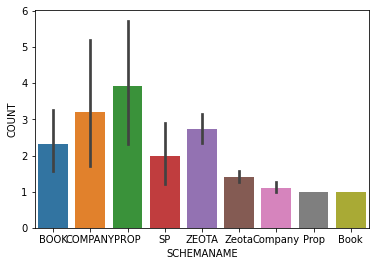

In [65]:
sns.barplot(x=df['SCHEMANAME'],y=df['COUNT'])

<AxesSubplot:xlabel='CONSTRAINT_TYPE', ylabel='COUNT'>

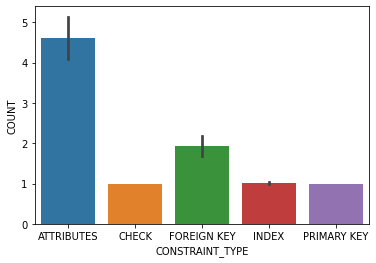

In [66]:
sns.barplot(x=df['CONSTRAINT_TYPE'],y=df['COUNT'])

In [79]:
df1= pd.read_csv('USECASE5.csv')
df1

,OWNER,TABLE_NAME,NN,RANK
0,HR,COUNTRIES,1,1
1,IT4,DEPARTMENT,1,1
2,IT4,COMPANY,1,1
3,IT4,JOB,1,1
4,IT4,ENROLLMENT,1,1
...,...,...,...,...
75,IT4,COURSE_LINE,4,76
76,HR,JOB_HISTORY,4,76
77,IT4,INTERNSHIP,4,76
78,HR,EMPLOYEES,5,79


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OWNER       80 non-null     object
 1   TABLE_NAME  80 non-null     object
 2   NN          80 non-null     int64 
 3   RANK        80 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB


<AxesSubplot:xlabel='OWNER', ylabel='NN'>

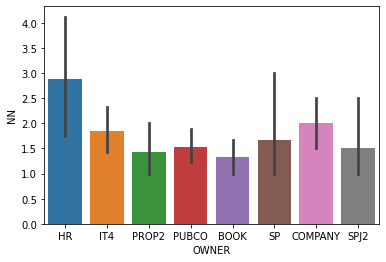

In [83]:
sns.barplot(x=df1['OWNER'],y=df1['NN'])

<AxesSubplot:xlabel='OWNER', ylabel='RANK'>

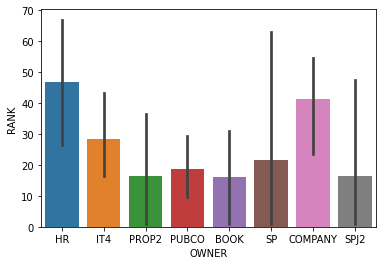

In [84]:
sns.barplot(x=df1['OWNER'],y=df1['RANK'])

In [89]:
df2= pd.read_csv('USECASE2.csv')
df2

,OWNER,TABLE_NAME,CONSTRAINTS,COUNT
0,BOOK,AUTHOR,ATTRIBUTES,3
1,BOOK,BOOK,ATTRIBUTES,6
2,BOOK,BRANCH,ATTRIBUTES,4
3,BOOK,INVENTORY,ATTRIBUTES,3
4,BOOK,PUBLISHER,ATTRIBUTES,3
...,...,...,...,...
248,PUBCO,RETURNED_PRODUCT,R,2
249,PUBCO,REV_ADDRESS,R,2
250,SP,SP2,R,2
251,SPJ2,SPJ,R,3


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OWNER        253 non-null    object
 1   TABLE_NAME   253 non-null    object
 2   CONSTRAINTS  253 non-null    object
 3   COUNT        253 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 8.0+ KB


<AxesSubplot:xlabel='OWNER', ylabel='COUNT'>

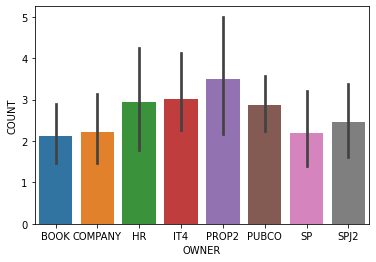

In [92]:
sns.barplot(x=df2['OWNER'],y=df2['COUNT'])

<AxesSubplot:xlabel='CONSTRAINTS', ylabel='COUNT'>

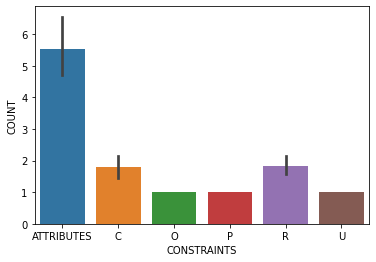

In [94]:
sns.barplot(x=df2['CONSTRAINTS'],y=df2['COUNT'])

In [5]:
import pandas as pd
df2= pd.read_csv('USECASE1.csv')

df2

,OWNER,TABLE_NAME,COUNT
0,HR,REGIONS,4
1,IT4,PROGRAM,43
2,IT4,COURSE_PROGRAM,235
3,IT4,RETAKE_PREREQS,0
4,SPJ2,SPJ,24
...,...,...,...
80,IT4,CERT,34
81,IT4,INTERNSHIP,445
82,IT4,RETAKE_GEN_ED,0
83,SPJ2,J,7


<AxesSubplot:xlabel='OWNER', ylabel='COUNT'>

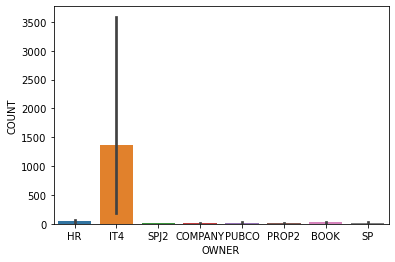

In [7]:
import seaborn as sns
sns.barplot(x=df2['OWNER'],y=df2['COUNT'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 [Text(0, 0, 'REGIONS'),
  Text(1, 0, 'PROGRAM'),
  Text(2, 0, 'COURSE_PROGRAM'),
  Text(3, 0, 'RETAKE_PREREQS'),
  Text(4, 0, 'SPJ'),
  Text(5, 0, 'PROJECT'),
  Text(6, 0, 'AUTHOR_COAUTHOR_MANUSC'),
  Text(7, 0, 'SHIP_ADDRESS'),
  Text(8, 0, 'BOOK'),
  Text(9, 0, 'PRIVATE_OWNER'),
  Text(10, 0, 'PUBLISHER'),
  Text(11, 0, 'CERTIFICATION'),
  Text(12, 0, 'PREREQUISITE'),
  Text(13, 0, 'COURSE_LINE'),
  Text(14, 0, 'STUD_PROG'),
  Text(15, 0, 'ADDRESS'),
  Text(16, 0, 'COVER'),
  Text(17, 0, 'RETURNED_PRODUCT'),
  Text(18, 0, 'MONTHLY_SALE'),
  Text(19, 0, 'VIEWING'),
  Text(20, 0, 'LEASE'),
  Text(21, 0, 'JOBS'),
  Text(22, 0, 'JOB_HI

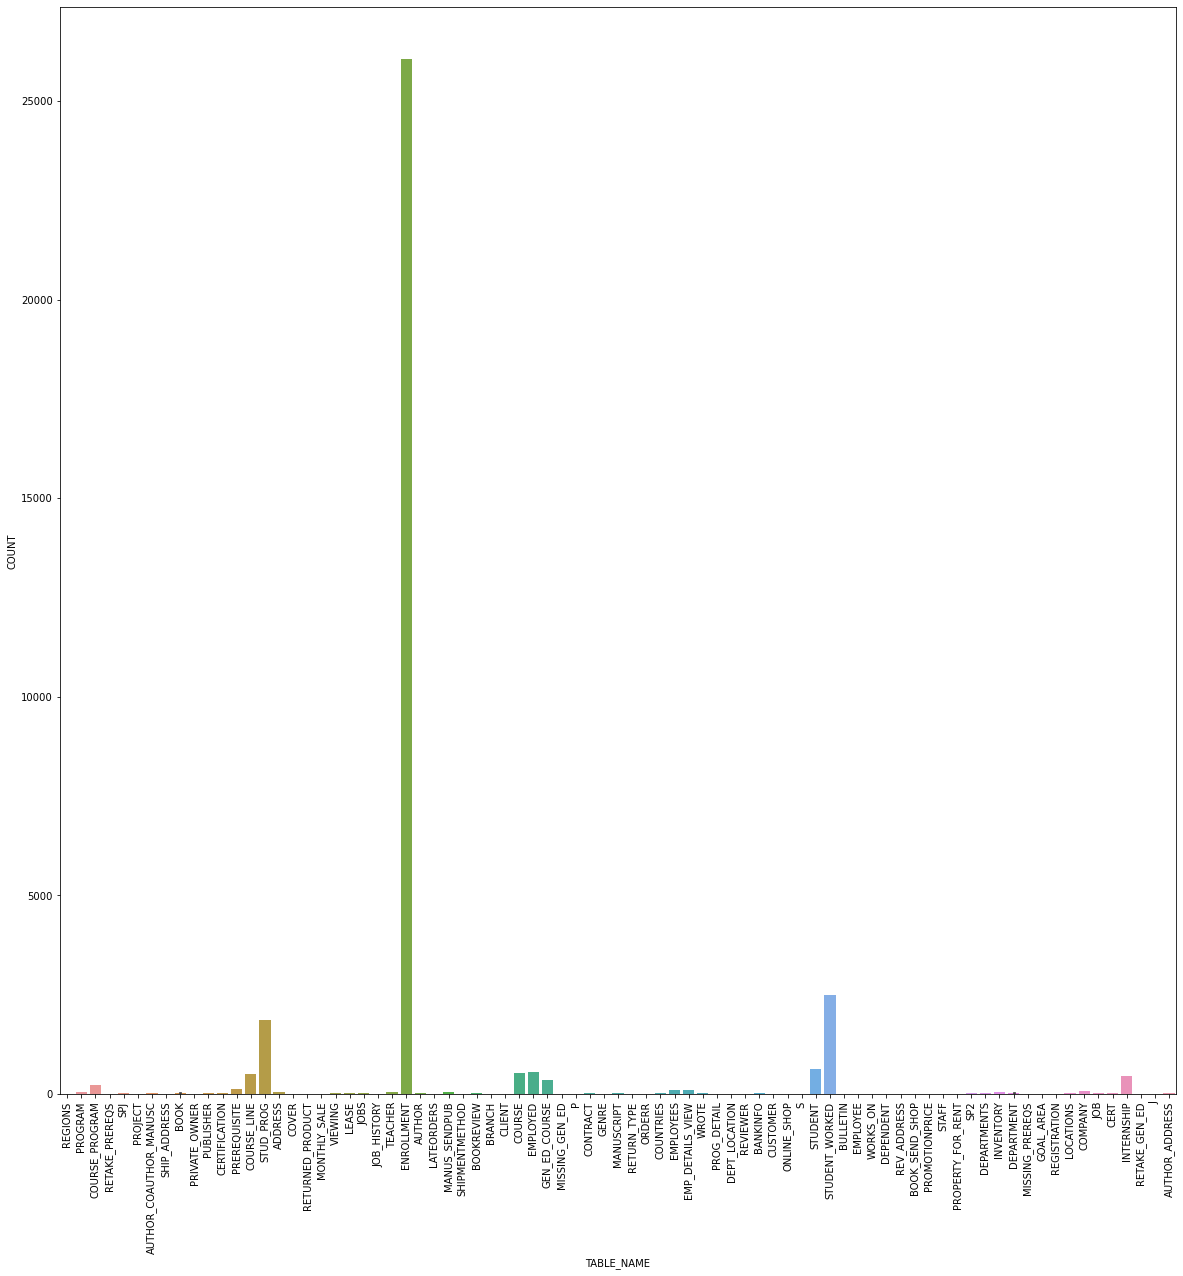

In [14]:

plt.figure(figsize=(20,20))
sns.barplot(x=df2['TABLE_NAME'],y=df2['COUNT'])
plt.xticks(rotation = 90)


In [ ]:
!pip install pandasql

In [ ]:
from pandasql import sqldf

In [ ]:
from mysql.connector import MySQLConnection, Error

#sqldf = pd.DataFrame(cursor.execute("dbo.report_exe"))
sqldf = cursor.execute("dbo.report_exe")
#sqldf.head(10)
for result in sqldf:
#print(list(sqldf))
      display(result)


In [ ]:
result = cursor.fetchall()
print(result)

In [ ]:
#result = cursor.fetchall()
insertObject = {}
columnNames = [column[0] for column in cursor.description]

for result in sqldf:
    insertObject.update( dict( zip( "SCHEMA_NAME","ATTR","FK","IDX","PK","PGM","UQ","CC","NN", result ) ) )
    

In [ ]:
display(result)

In [ ]:
type(insertObject)

In [ ]:
print(insertObject)

In [ ]:
list.insert()

In [ ]:
df = pd.DataFrame(result)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
sqldf.astype(list)

In [ ]:
df = pd.DataFrame(list(sqldf))

In [ ]:
pd.DataFrame(list(sqldf),columns=["SCHEMA_NAME","ATTR","FK","IDX","PK","PGM","UQ","CC","NN"])

In [ ]:
df.head()

In [ ]:
query = cursor.execute("dbo.report_exe")
df_procedure=pd.read_sql_query('query',conn)

display(df_procedure)